## networkx csomag gráfokhoz

Egy 6 települést összekötő, egyirányú úthálózaton szeretnénk megtalálni a legrövidebb utat az 1-es településből a 6-osba. A településeket az alábbi útszakaszok kapcsolják össze:

$$
\begin{array}{c|c|c}
\text{Honnan} & \text{Hová} & \text{Távolság} \\ \hline
1 & 2 & 16 \\
1 & 3 & 32 \\
2 & 4 & 7 \\
2 & 5 & 35 \\
3 & 5 & 12 \\
4 & 3 & 8 \\
4 & 6 & 27 \\
5 & 6 & 6
\end{array}
$$

Az első teendőnk az úthálózat reprezentálása egy gráf segítségével, amelyben majd a legrövidebb utat meg tudjuk keresni.

In [ ]:
pip install networkx
# az első alkalommal

In [7]:
import networkx as nx

In [2]:
G = nx.DiGraph()
# irányítatlan gráf esetén: G = nx.Graph()

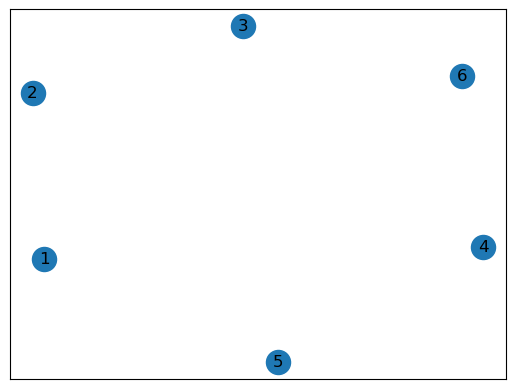

In [3]:
# csúcsok hozzáadása:
G.add_nodes_from(range(1,7))
nx.draw_networkx(G, with_labels=True)
#nx.draw_networkx(G, pos, with_labels=True)

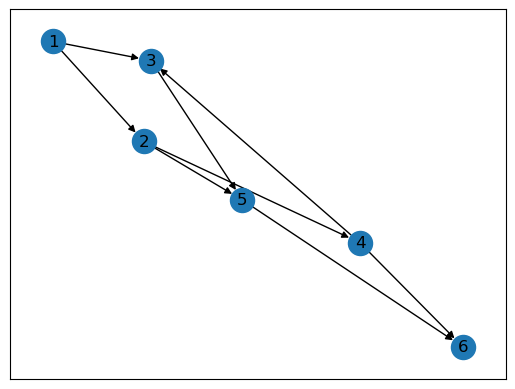

In [4]:
# élek hozzáadása élsúllyal:
G.add_edge(1, 2, weight = 16)
G.add_edge(1, 3, weight = 32)
G.add_edge(2, 4, weight = 7)
G.add_edge(2, 5, weight = 35)
G.add_edge(3, 5, weight = 12)
G.add_edge(4, 3, weight = 8)
G.add_edge(4, 6, weight = 27)
G.add_edge(5, 6, weight = 6)
nx.draw_networkx(G, with_labels=True)

{('1', '2'): Text(0.7499999888241293, 0.433012741974907, '16'),
 ('1', '3'): Text(0.24999998137354879, 0.4330127121725851, '32'),
 ('2', '4'): Text(-0.24999999627470976, 0.4330126982635194, '7'),
 ('2', '5'): Text(4.4703482915409154e-08, 2.4504569873240456e-08, '35'),
 ('3', '5'): Text(-0.49999996274709757, -5.297752070365647e-09, '12'),
 ('4', '3'): Text(-0.7500000037252903, 0.43301266846119746, '8'),
 ('4', '6'): Text(-0.2500000260770317, -0.43301273667715495, '27'),
 ('5', '6'): Text(1.4901160971803051e-08, -0.8660254104361045, '6')}

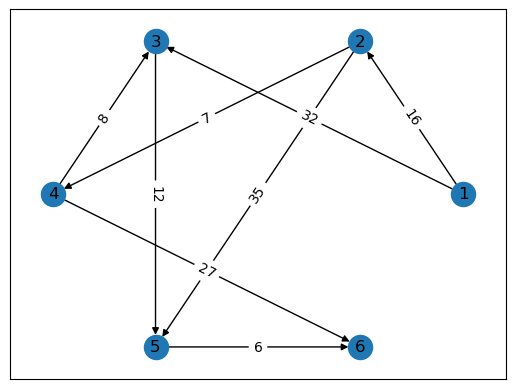

In [5]:
# megkapható ugyanez .csv file-ból történő beolvasással is
G = nx.read_edgelist("graph1.csv", create_using=nx.DiGraph, data=(("weight", int),), delimiter=",")
# ahol a .csv file tartalma jelen esetben:
# 1,2,16
# 1,3,32
# 2,4,7
# 2,5,35
# 3,5,12
# 4,3,8
# 4,6,27
# 5,6,6
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [11]:
import matplotlib.pyplot as plt

for u,v in G.edges():
    if G[u][v]["weight"] % 2 == 0:
        G[u][v]["color"] = "blue"
    else:
        G[u][v]["color"] = "red"

colors = [G[u][v]["color"] for u,v in G.edges()]

nx.draw_networkx(G, pos)
nx.draw_networkx_edges(G,pos, edge_color = colors)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G,pos, edge_labels)
plt.show()

KeyError: 'weight'

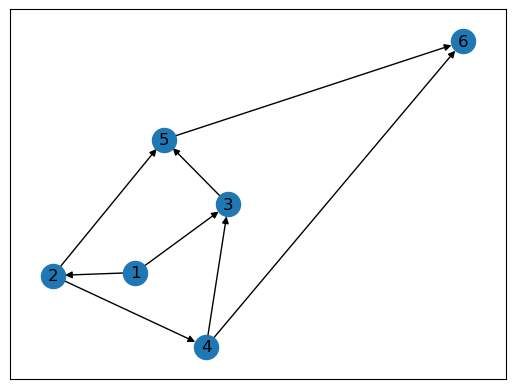

In [7]:
pos = nx.spring_layout(G, seed=7) # csúcsok pozíciójának meghatározása - csak ábrázolási kérdés, a gráfot magát nem befolyásolja
nx.draw_networkx(G, pos, with_labels=True)

In [8]:
# gráf reprezentáció:
A = nx.adjacency_matrix(G)
print(A.todense())

[[ 0 16 32  0  0  0]
 [ 0  0  0  7 35  0]
 [ 0  0  0  0 12  0]
 [ 0  0  8  0  0 27]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  0  0]]


In [9]:
# gráf megadható a szomszédsági mátrixából is a pandas segítségével
import pandas as pd
df = pd.DataFrame([[0, 16, 32, 0, 0, 0], [0, 0, 0, 7, 35, 0], [0, 0, 0, 0, 12, 0], [0, 0, 8, 0, 0, 27], [0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0]])
# a csúcsok számozása ekkor 0-tól indul, ha 1-től szeretnénk indítani:
df.index += 1
df.columns += 1
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

In [10]:
A=nx.incidence_matrix(G, oriented=True)
print(A.todense())

[[ 1.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  1.  0.  0.  0.]
 [ 0. -1. -1.  0.  0.  1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -1. -1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. -1. -1.]]


A networkx segítségével használhatunk olyan algoritmusok implementációját, mint például a BFS és DFS gráfbejárások.

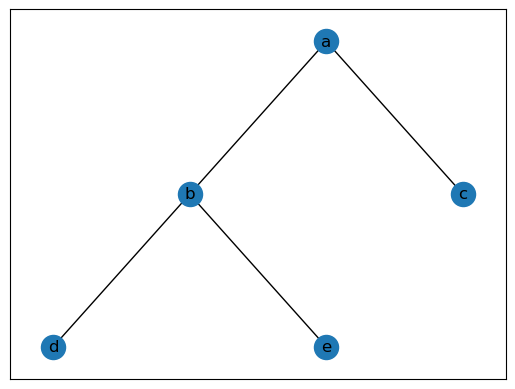

[('a', 'b'), ('b', 'd'), ('b', 'e'), ('a', 'c')]
[('a', 'b'), ('a', 'c'), ('b', 'd'), ('b', 'e')]


In [13]:
G = nx.Graph()

G.add_edge("a","b")
G.add_edge("a","c")
G.add_edge("b","d")
G.add_edge("b","e")

#plotting the graph
pos = {"a": (2,2), "b": (1,1), "c": (3,1), "d": (0,0), "e": (2,0)}
nx.draw_networkx(G, pos, with_labels = True)
plt.show()

#bfs and dfs yield different traversals
print([edge for edge in nx.dfs_edges(G, "a")])
print([edge for edge in nx.bfs_edges(G, "a")])

### 1. Feladat:
Hozzunk létre egy függvényt, ami megadja egy gráf komponenseinek számát gráfbejárás segítségével!
Lépések:

0. Minden csúcshoz rendeljünk hozzá két értéket: visited (bool) és komponens_id (int). A kezdő értékek legyen 'False' és 'None'.

1. Hozzunk létre egy *int* változót: aktualis_komponens 0 kezdőértékkel.

2. Iteráljunk végig a gráf csúcshalmazán. Ha egy csúcsban már jártunk (a 'visited' értéke 'True'), akkor ugorjuk át, egyébként futtassunk BFS-t az aktuális csúcs kezdőpontból.

    2a. Menjünk végig a BFS bejárás által érintett csúcsokon. Jelöljünk minden csúcs 'visited' értékét 'True'-ra és állítsuk a 'komponens_id'-jük értékét 'aktualis_komponens'-re.
    
    2b. Növeljük meg az aktualis_komponens értékét.
    
    
3. Adjuk vissza az aktuális_komponens értékét.


In [15]:
def number_of_components(G):
    
    for u in G.nodes():
        G.nodes[u]["visited"] = False
        G.nodes[u]["component_id"] = None
        
    current_component = 0
        
    for u in G.nodes():
        if  G.nodes[u]["visited"] == False:
            for v in nx.bfs_tree(G, u):
                G.nodes[v]["visited"] = True
                G.nodes[v]["component_id"] = current_component
            current_component += 1
    
    return current_component


In [17]:
print(number_of_components(G))
print(nx.is_connected(G))
print(nx.number_connected_components(G))

1
True
1


Szintén elérhető a Kruskal algoritmus minimális összsúlyú feszítőfa meghatározására...

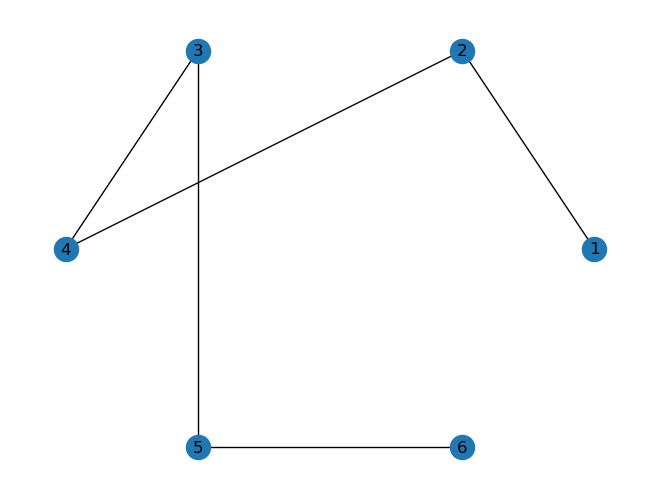

In [19]:
# minimális összsúlyú feszítőfa Kruskal algoritmusával (irányítatlan gráfon):
H = nx.read_edgelist("graph1.csv", data=(("weight", int),), delimiter=",")
MCST=nx.minimum_spanning_tree(H, algorithm='kruskal')
pos = nx.circular_layout(H)
nx.draw(MCST, pos, with_labels=True)

... vagy például kereshetünk legrövidebb utat a Dijkstra algoritmussal:

In [16]:
hossz, rovid_ut = nx.single_source_dijkstra(H, '1', '6')
print('A legrövidebb út:', rovid_ut)
print('A legrövidebb út hossza: ', hossz)

A legrövidebb út: ['1', '2', '4', '3', '5', '6']
A legrövidebb út hossza:  49
